<a href="https://colab.research.google.com/github/DristantaNirola/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank Stock Closing Price Prediction:

## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Importing the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset:

In [7]:
stock_price_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 5/Week 1/Day 1/data_YesBank_StockPrices.csv')

# shape of the dataset 
stock_price_df.shape

(185, 5)

In [18]:
# Top 5 values
stock_price_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [17]:
# Bottom 5 values
stock_price_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


## 1. Exploratory Data Analysis:

In [14]:
# finding the high level statistics for the continious features
stock_price_df.iloc[:,1:].describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


* No null values in the dataframe.

### 1.1. Multi line plot

In [15]:
# setting dates as the index to the the dataframe
stock_price = stock_price_df.set_index('Date')

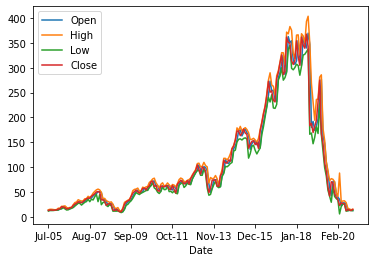

In [16]:
stock_price.plot.line()

* The trend shows that the stock price actully fall from 2018 onwards which shows the impact of 2018 fraud case involving Rana Kapoor for which it has been in the news.

### Closing price trend:


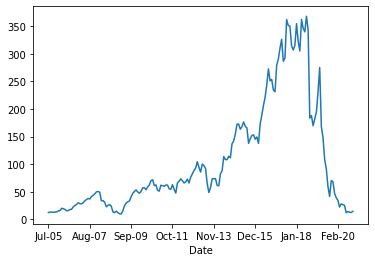

In [20]:
line= stock_price['Close'].plot.line()

In [23]:
# Date of maximum closing price
stock_price[stock_price['Close']== stock_price['Close'].max()]

,Open,High,Low,Close
Date,,,,
Jul-18,340.0,393.35,332.45,367.9


In [24]:
# Date of maximum closing price
stock_price[stock_price['Close']== stock_price['Close'].min()]

,Open,High,Low,Close
Date,,,,
Mar-09,10.0,11.24,8.16,9.98


In [33]:
#Date of maximum price jump
price_jump= np.array(stock_price['Close'].iloc[1:]) - np.array(stock_price['Close'].iloc[:-1])

In [38]:
stock_price.iloc[np.argmax(price_jump),:]

Open     286.66
High     306.34
Low      280.21
Close    292.37
Name: Jun-17, dtype: float64